In [26]:
import tensorflow as tf

In [27]:
import numpy as np

In [28]:
#Fake X data 
X_data = np.random.random((10000, 2))

#Face sample weight
sample_weights = np.array([3,4]).reshape(2, )

#Fake y data
y_data = np.matmul(X_data, sample_weights)

In [29]:
X_data[0]

array([0.08976858, 0.01666695])

In [30]:
y_data[0]

0.3359735220096697

In [31]:
#Approximation

y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [32]:
y_data[0]

-0.07419551757565157

In [33]:
y_data = y_data.reshape(len(y_data), 1)

In [34]:
y_data.shape

(10000, 1)

In [35]:
X_data

array([[0.08976858, 0.01666695],
       [0.09336379, 0.60028492],
       [0.12693047, 0.80900415],
       ...,
       [0.98194892, 0.82779649],
       [0.320289  , 0.95808509],
       [0.88911469, 0.90822175]])

In [36]:
y_data

array([[-0.07419552],
       [ 2.27106204],
       [ 3.206639  ],
       ...,
       [ 5.8468637 ],
       [ 4.38303832],
       [ 5.89006206]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [38]:
X_train.shape
y_train.shape

(8000, 1)

In [39]:
#Placeholder for pass data
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [40]:
#Trainable weights
W = tf.Variable(tf.ones([2,1]))
b = tf.Variable(np.random.randn(), dtype = tf.float32)

In [41]:
pred = tf.add(tf.matmul(X, W), b)

In [42]:
loss = tf.reduce_mean(tf.square(pred - Y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [43]:
init = tf.global_variables_initializer()

In [44]:
sess= tf.Session()

In [45]:
#Training
sess.run(init)
epochs = 5000
loss_history = []
for epoch in range(epochs) :
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    test_loss = sess.run(loss, feed_dict={X: X_test, Y: y_test})
    loss_history.append(test_loss)
    if epoch % 500 == 0:
        print("Epoch = {} Test loss ={} ".format(epoch, test_loss))
print("Training finished")

Epoch = 0 Test loss =8.4264554977417 
Epoch = 500 Test loss =0.142159566283226 
Epoch = 1000 Test loss =0.04695499688386917 
Epoch = 1500 Test loss =0.015648281201720238 
Epoch = 2000 Test loss =0.005241645500063896 
Epoch = 2500 Test loss =0.001760914921760559 
Epoch = 3000 Test loss =0.0005925389123149216 
Epoch = 3500 Test loss =0.000199577581952326 
Epoch = 4000 Test loss =6.72588066663593e-05 
Epoch = 4500 Test loss =2.267445597681217e-05 
Training finished


In [46]:
sess.run(W)

array([[2.9937568],
       [3.993012 ]], dtype=float32)

In [47]:
sess.run(b)

-0.40322986

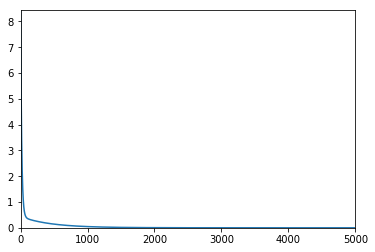

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [49]:
pred_y = sess.run(pred, feed_dict={
    X: [[3,10]]
})

In [50]:
print(pred_y)

[[48.50816]]
